In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [5]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


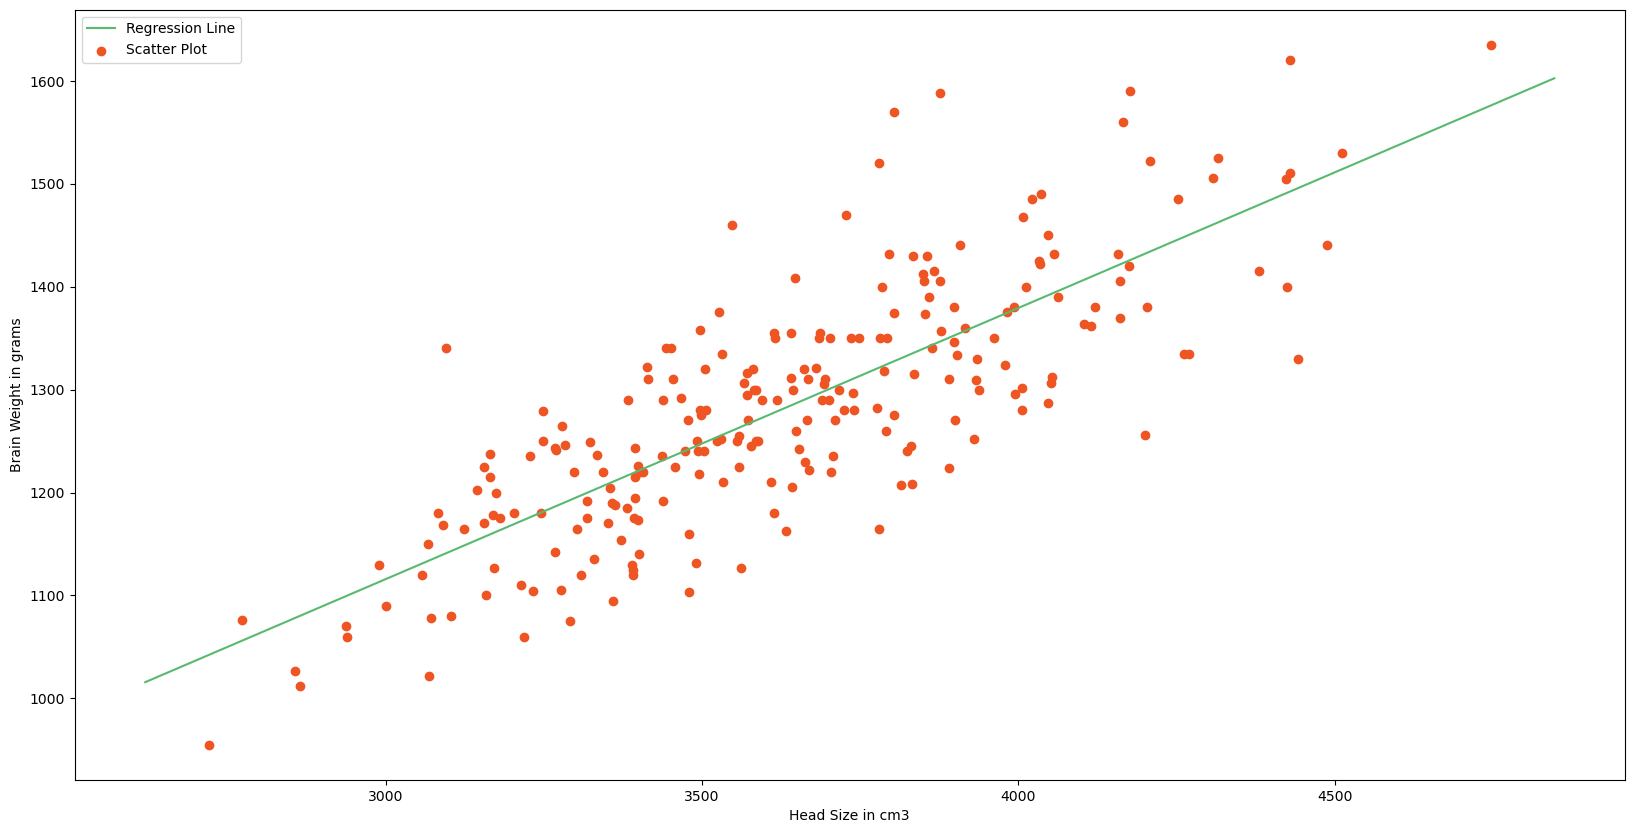

In [6]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [7]:
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


In [8]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


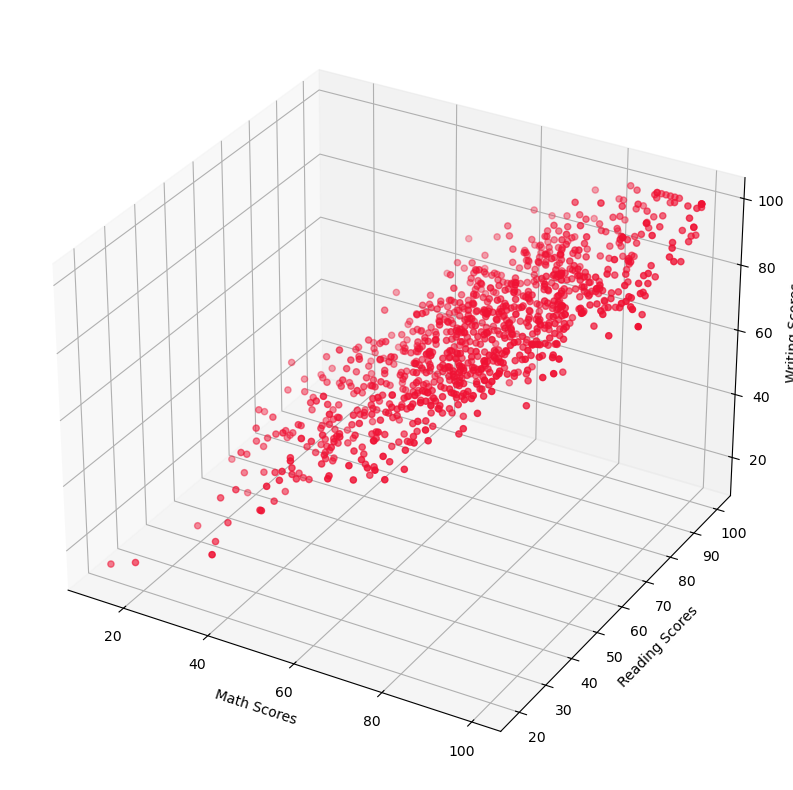

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import necessary for 3D plotting
import pandas as pd

# Assuming 'data' is your DataFrame with columns 'Math', 'Reading', and 'Writing'
# Replace this with the actual DataFrame loading step, for example:
# data = pd.read_csv('your_file.csv')

math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

# Plotting the scores as a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Correct way to add a 3D subplot
ax.scatter(math, read, write, color='#ef1234')

# Labeling the axes
ax.set_xlabel('Math Scores')
ax.set_ylabel('Reading Scores')
ax.set_zlabel('Writing Scores')

plt.show()

In [21]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [22]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [23]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

2470.11


In [24]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [25]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


In [26]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.577143972727789
0.9097223273061553


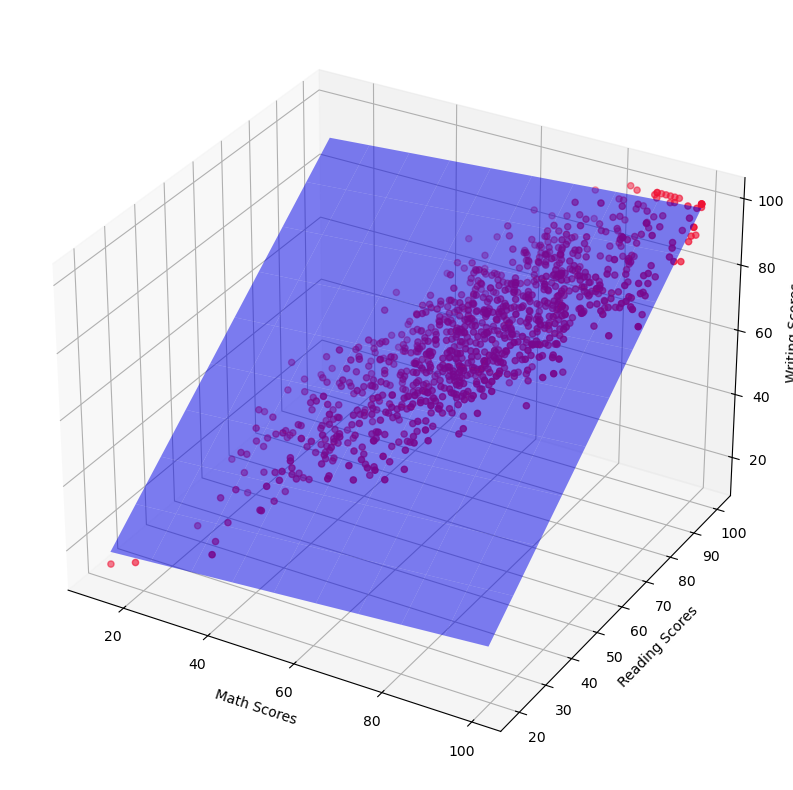

In [28]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
Y = np.array(write)

# Initial Coefficients
B = np.array([0, 0, 0])
alpha = 0.0001

# Gradient Descent Function
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

# Performing Gradient Descent
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# Predictions
Y_pred = X.dot(newB)

# Plotting the 3D Scatter Plot with the Regression Plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(math, read, write, color='#ef1234')

# Creating the regression plane
xx, yy = np.meshgrid(np.linspace(min(math), max(math), 10),
                     np.linspace(min(read), max(read), 10))
zz = newB[0] + newB[1] * xx + newB[2] * yy

# Plotting the plane
ax.plot_surface(xx, yy, zz, alpha=0.5, color='blue')

# Labeling the axes
ax.set_xlabel('Math Scores')
ax.set_ylabel('Reading Scores')
ax.set_zlabel('Writing Scores')

plt.show()